In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3
from matplotlib import pyplot as plt

In [2]:
#import documents
documents = []
for i in range(1,10):
    f = open("bbc//politics//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//politics//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc//politics//"+str(i)+str(".txt"))
    documents.append(f.read())    
    
for i in range(1,10):
    f = open("bbc//business//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//business//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc//business//"+str(i)+str(".txt"))
    documents.append(f.read()) 
    
for i in range(1,10):
    f = open("bbc//sport//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//sport//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc//sport//"+str(i)+str(".txt"),encoding = 'latin')
    documents.append(f.read())
    
for i in range(1,10):
    f = open("bbc//tech//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//tech//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,400):
    f = open("bbc//tech//"+str(i)+str(".txt"))
    documents.append(f.read())   
    
for i in range(1,10):
    f = open("bbc//entertainment//00"+str(i)+str(".txt"))
    documents.append(f.read())
for i in range(10,100):
    f = open("bbc//entertainment//0"+str(i)+str(".txt"))
    documents.append(f.read()) 
for i in range(100,386):
    f = open("bbc//entertainment//"+str(i)+str(".txt"))
    documents.append(f.read())    
    


In [3]:
len(documents)

1981

In [4]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [5]:

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [12]:
sample_numbers = range(1,1980,60)
summary = [documents[i] for i in sample_numbers]
print(len(sample_numbers))

stemmed_list = []
tokenized_list = []
for i in summary:
    
    allwords_stemmed = tokenize_and_stem(i)
    stemmed_list.append(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    tokenized_list.append(allwords_tokenized)
    

vocab_frame = pd.DataFrame({'words': allwords_tokenized}, index = allwords_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')


from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary) #fit the vectorizer to synopses
terms = tfidf_vectorizer.get_feature_names() #apparently this reduces the features??

print(tfidf_matrix.shape)

33
there are 650 items in vocab_frame
CPU times: user 470 ms, sys: 6.83 ms, total: 477 ms
Wall time: 490 ms
(33, 1172)


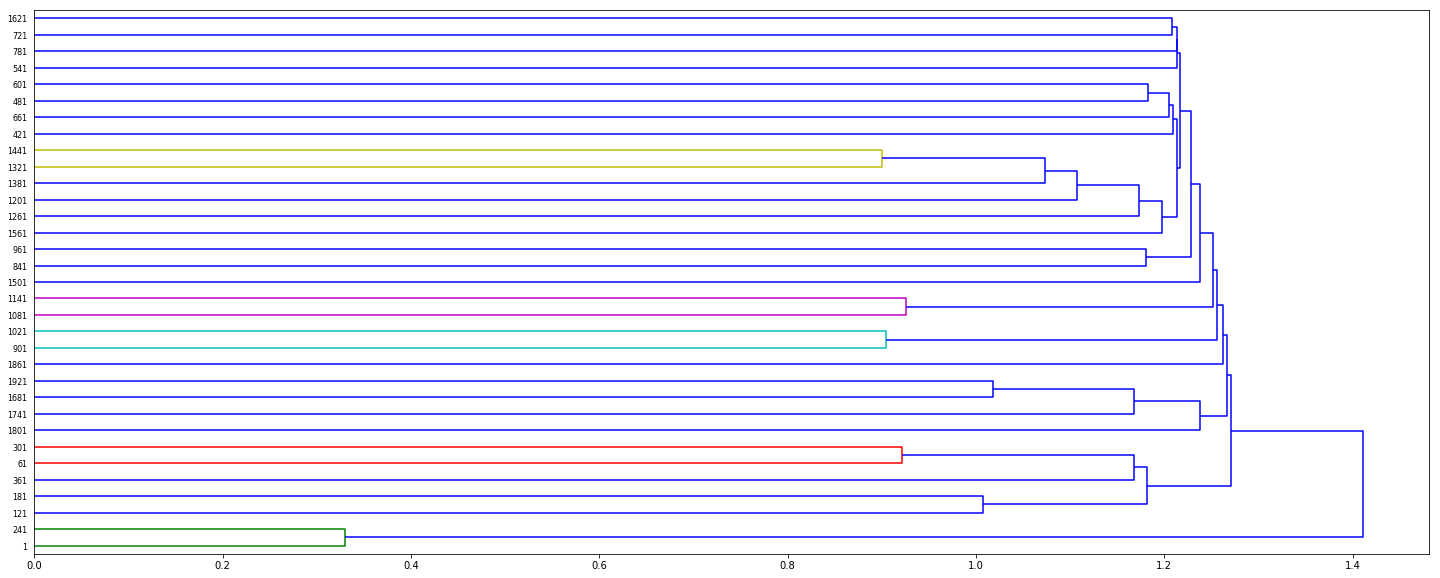

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances as distance
dist = 1 - cosine_similarity(tfidf_matrix)

from scipy.cluster.hierarchy import ward, dendrogram, linkage

#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix = linkage(dist)
#print(linkage_matrix)
titles = sample_numbers

#uncomment below to save figure

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")

plt.savefig("Figures//Traditional_BBC//Traditional_BBC_dendrogram_step_60.pdf")

## Perform K-Means with PCA on BBC

CPU times: user 5.15 s, sys: 13.3 ms, total: 5.17 s
Wall time: 2.6 s
[1, 4, 4, 1, 4, 4, 1, 4, 1, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 1, 0, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3]


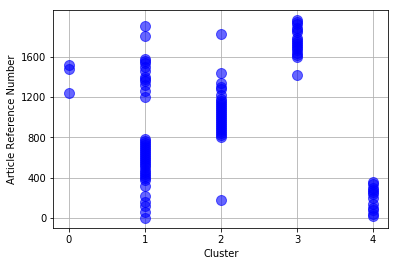

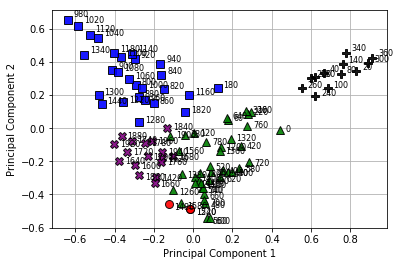

In [100]:
num_clusters = 5     #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)

run = 5

%time km.fit(dist)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,5), range(0,5))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(dist)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)

We have produced 4 differnet clusters with 40 samples from the bunch of articles we have. 
The first figure, with the K-Means clusters, shows that there is a pattern which agrees with what we expect. 

In [101]:
print(clusters)

[1, 4, 4, 1, 4, 4, 1, 4, 1, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 1, 0, 1, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3]


In [102]:
list1 =[j for j in [4,1,2,0,3] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
#score = sum(ones*1)/len(ones)
#print(score)

In [103]:
print(len(list1),len(clusters))

100 99


In [104]:
step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

[array([False,  True,  True, False,  True,  True, False,  True, False,
        False,  True, False,  True,  True,  True,  True, False,  True,
         True, False]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False,
        False, False]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True, False,  True,  True,
         True])]

In [105]:
scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
print(np.mean(scores))

[0.6, 1.0, 1.0, 0.15, 0.8421052631578947]
0.718421052631579


This measure shows to what extent the actual clusters agree with the predicted ones.

[0.6, 1.0, 0.95, 0.15, 0.8421052631578947]


0.7084210526315788

[0.6, 1.0, 1.0, 0.15, 0.8947368421052632]


0.7289473684210527

Figures start here

[0.75, 1.0, 1.0, 0.15, 0.8421052631578947]

0.7484210526315789

[0.6, 1.0, 1.0, 0.15, 0.8421052631578947]

0.718421052631579

[0.6, 1.0, 0.95, 0.15, 0.8421052631578947]

0.7084210526315788

[0.65, 1.0, 1.0, 0.15, 0.8421052631578947]

0.7284210526315789

[0.65, 1.0, 1.0, 0.15, 0.8421052631578947]

0.7284210526315789

[0.6, 1.0, 1.0, 0.15, 0.8421052631578947]

0.718421052631579




CPU times: user 4.97 s, sys: 19.3 ms, total: 4.99 s
Wall time: 2.51 s
[2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0]


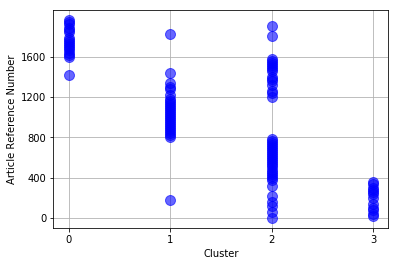

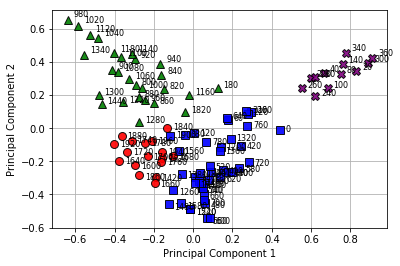

In [109]:
#try 4 clusters 

num_clusters = 4    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)

run = 0

%time km.fit(dist)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,4), range(0,4))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\4_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(dist)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\4_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)


In [110]:
print(clusters)

[2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0]


In [115]:
list1 =[j for j in [3,2,1,2,0] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
mean_scores = [for score in scores]

0.8282828282828283
[0.6, 1.0, 1.0, 0.7, 0.8421052631578947]
0.828421052631579


[0.6, 1.0, 1.0, 0.7, 0.8421052631578947]


0.828421052631579
proper score: 0.823025

CPU times: user 4.26 s, sys: 14.3 ms, total: 4.28 s
Wall time: 2.15 s
[0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


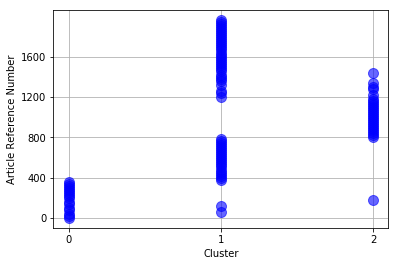

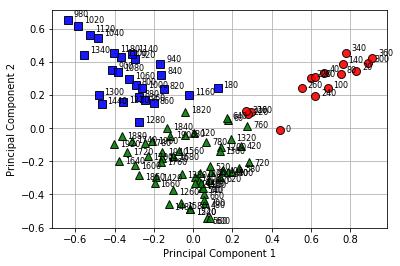

In [116]:
#try 4 clusters 

num_clusters = 3    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)

run = 0

%time km.fit(dist)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,3), range(0,3))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\3_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(dist)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\3_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)


In [118]:
print(clusters)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [119]:
list1 =[j for j in [0,1,2,1,1] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
print(np.mean(scores))

0.9090909090909091
[0.8, 1.0, 1.0, 0.75, 1.0]
0.9099999999999999


[0.8, 1.0, 1.0, 0.75, 1.0]

0.9099999999999999
proper score: 0.905

CPU times: user 3.42 s, sys: 14.4 ms, total: 3.44 s
Wall time: 1.73 s
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


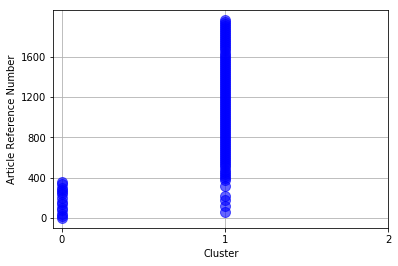

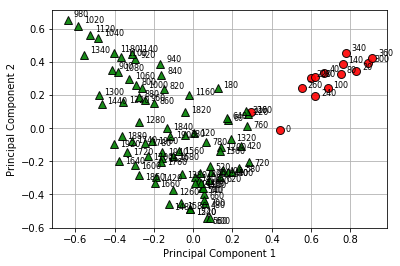

In [120]:
#try 4 clusters 

num_clusters = 2    #Set the number of clusters
km = KMeans(n_clusters=num_clusters,n_init = 1000,max_iter= 600)

run = 0

%time km.fit(dist)     #Fit K-Means using the distance matrix

clusters = km.labels_.tolist()
print(clusters)

plt.plot(clusters,sample_numbers, 'o', color = 'blue', markersize = 10,alpha = 0.6)
plt.grid()
plt.xlabel("Cluster")
plt.ylabel("Article Reference Number")
plt.xticks(range(0,3), range(0,3))
plt.yticks(range(0,2000,400), range(0,2000,400))
#plt.savefig("KMeansClustering.pdf")
colours = ["red","green","blue","purple","black"]
#colours = [(0.2,0.5,0.2),(0.2,0.5,0.5),(0.2,0.5,0.9)]


shape = ["o", "^", "s", "X","P"]

#plt.savefig("Figures\\LDA_BBC\\politicians_k_means_boostrap_seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\2_BBC_k_means_No_Boostrap_" + str(run) + ".pdf")

#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state = 8)

coordinates = pca.fit_transform(dist)
#print(coordinates)
#print(np.sum(np.abs(coordinates),axis = 0))


plt.figure()#figsize = (8,6)
for i, txt in enumerate(sample_numbers):
    
    plt.plot(coordinates[i,0], coordinates[i,1],marker = shape[clusters[i]],color = colours[clusters[i]],
         markersize = 8,alpha = 0.9,markeredgecolor = "black", label = sample_numbers[i])
    plt.text(coordinates[i,0]+0.03, coordinates[i,1]*(1.05)-0.01,s = sample_numbers[i],size=8
             ,bbox=dict(boxstyle="square",
               ec=(1., 1.0, 1.0),
               fc=(1., 1, 1),alpha = 0))

#plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.grid()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.savefig("Figures\\Traditional_BBC\\Politicians_PCA_Boostrap_Seed_"+str(seed)+".pdf")
plt.savefig("Figures\\Traditional_BBC\\2_BBC_PCA_No_Boostrap_" + str(run) + ".pdf")
#np.savetxt("quality_tou_kinitou_sou.txt",pplist)


In [121]:
print(clusters)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [122]:
list1 =[j for j in [0,1,1,1,1] for i in range(0,20)]

ones = np.asarray(list1[:-1])==np.asarray(clusters)
score = sum(ones*1)/len(ones)
print(score)

step = 20
cut_ones = [ones[i:i+step] for i in range(0,100,step)]
cut_ones

scores = [sum(o)/len(o) for o in cut_ones]
print(scores)
print(np.mean(scores))

0.9393939393939394
[0.7, 1.0, 1.0, 1.0, 1.0]
0.9400000000000001


0.9393939393939394

[0.7, 1.0, 1.0, 1.0, 1.0]

0.9400000000000001

proper score: 0.85

We can see that the best score corresponds to the case where we have 3 clusters. 

- Politics 
- Sport
- Tech & Business & Entertainment



there are 453 items in vocab_frame
CPU times: user 2.55 s, sys: 42.6 ms, total: 2.59 s
Wall time: 2.71 s
(200, 697)


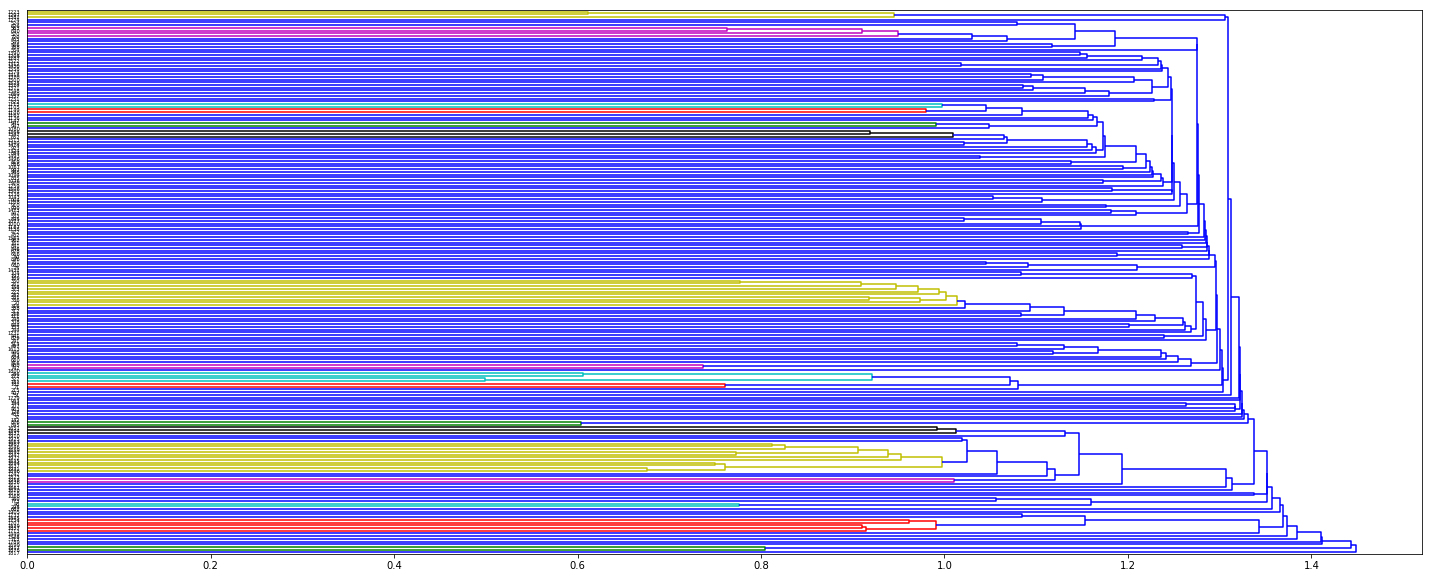

In [11]:
import random as rd

run = 0
rd.seed(run)
indices = [range(i,i+400) for i in range(0,1600,400)]
indices.append(range(1600,1986))

sample = [rd.sample(index,k=40) for index in indices]
ss = [x for y in sample for x in y]
sample = [documents[i] for i in ss]

sample_numbers = ss
summary = sample

stemmed_list = []
tokenized_list = []
for i in summary:
    
    allwords_stemmed = tokenize_and_stem(i)
    stemmed_list.append(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    tokenized_list.append(allwords_tokenized)
    

vocab_frame = pd.DataFrame({'words': allwords_tokenized}, index = allwords_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')


from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary) #fit the vectorizer to synopses
terms = tfidf_vectorizer.get_feature_names() #apparently this reduces the features??

print(tfidf_matrix.shape)


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances as distance
dist = 1 - cosine_similarity(tfidf_matrix)

from scipy.cluster.hierarchy import ward, dendrogram, linkage

#linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix = linkage(dist)
#print(linkage_matrix)
titles = sample_numbers

#uncomment below to save figure

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels = titles, orientation = "right")